In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
df = pd.read_csv("creditcard.csv")
#Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have
#not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between
#each transaction and the first transaction in the dataset.

In [3]:
df.rename(columns = {'Class':'isFraud'}, inplace = True) 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['isFraud'].value_counts()

0    284315
1       492
Name: isFraud, dtype: int64

(array([2.62369e+05, 1.31640e+04, 4.02500e+03, 1.96100e+03, 9.64000e+02,
        5.68000e+02, 3.64000e+02, 2.62000e+02, 1.23000e+02, 1.03000e+02,
        8.50000e+01, 5.90000e+01, 4.50000e+01, 4.70000e+01, 3.80000e+01,
        3.10000e+01, 2.20000e+01, 1.10000e+01, 1.40000e+01, 8.00000e+00,
        7.00000e+00, 3.00000e+00, 6.00000e+00, 5.00000e+00, 1.00000e+00,
        4.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        4.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

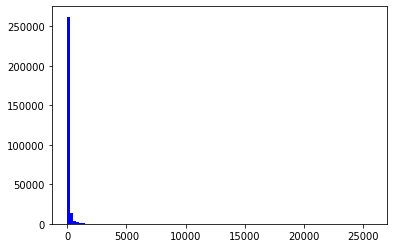

In [5]:
import matplotlib.pyplot as plt
plt.hist(df[df.isFraud == False]['Amount'], color='b', label='Real', bins=100)

(array([230.,  27.,  14.,   5.,  12.,   8.,   9.,   4.,   5.,   2.,   3.,
          6.,   3.,   5.,  38.,   7.,   3.,   5.,   3.,   1.,   3.,   1.,
          1.,   0.,   4.,   2.,   5.,   1.,   1.,   2.,   0.,   1.,   1.,
          4.,   2.,   3.,   2.,   0.,   3.,   0.,   1.,   2.,   0.,   2.,
          4.,   5.,   0.,   1.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

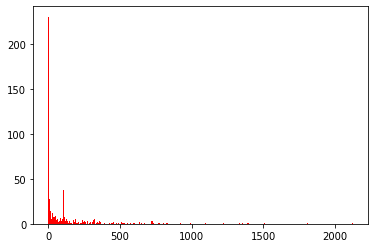

In [6]:
plt.hist(df[df.isFraud == True]['Amount'], color='r', label='Fraud', bins=300)

##### clean data and generate train & test sets

In [7]:
def norm(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [8]:
from sklearn.model_selection  import train_test_split
X, y = df.iloc[:,:-1], df.iloc[:, -1]
y_numeric = y
y = keras.utils.to_categorical(y, num_classes=2) 
#one-hot encoded for use with categorial cross entropy loss. category 0 is for real. cat 1 is for fraud.

X_orig = X
X = norm(X) #normalize the data to N(0,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#corresponding for resampling methods (we need to use different datatype)
y_num_train = y_numeric[X_train.index]
y_num_test = y_numeric[X_test.index]

##### Sampling Methods : SMOTE (oversampling) & nearmiss (undersampling)

In [9]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_num_train)
y_train_res = keras.utils.to_categorical(y_train_res, num_classes=2) #for compatibility with categorical_crossentropy



SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.



In [10]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_num_train)
y_train_miss = keras.utils.to_categorical(y_train_miss, num_classes=2) #for compatibility with categorical_crossentropy

##### Creating our Loss functions: Focal Loss & Asymmetric Loss

In [11]:
import tensorflow as tf

In [12]:

# focal loss method, source: https://github.com/Tony607/Focal_Loss_Keras

class FocalLoss(keras.losses.Loss):
    def __init__(self, gamma=2., alpha=4.,
                 reduction=keras.losses.Reduction.AUTO, name='focal_loss'):
        """Focal loss for multi-classification
        FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        Notice: y_pred is probability after softmax
        gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        Focal Loss for Dense Object Detection
        https://arxiv.org/abs/1708.02002

        Keyword Arguments:
            gamma {float} -- (default: {2.0})
            alpha {float} -- (default: {4.0})
        """
        super(FocalLoss, self).__init__(reduction=reduction,
                                        name=name)
        self.gamma = float(gamma)
        self.alpha = float(alpha)

    def call(self, y_true, y_pred):
        """
        Arguments:
            y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
            y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        Returns:
            [tensor] -- loss.
        """
        epsilon = 1.e-9
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)

        model_out = tf.add(y_pred, epsilon)
        ce = tf.multiply(y_true, -tf.math.log(model_out))
        weight = tf.multiply(y_true, tf.pow(
            tf.subtract(1., model_out), self.gamma))
        fl = tf.multiply(self.alpha, tf.multiply(weight, ce))
        reduced_fl = tf.reduce_max(fl, axis=1)
        return tf.reduce_mean(reduced_fl)


In [13]:
#asymmetric loss
#https://github.com/keras-team/keras/issues/2115
import tensorflow.keras.backend as K
from tensorflow.keras.losses import CategoricalCrossentropy


class WeightedCategoricalCrossentropy(CategoricalCrossentropy):
    
    def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):
        assert cost_mat.ndim == 2
        assert cost_mat.shape[0] == cost_mat.shape[1]
        
        super().__init__(name=name, **kwargs)
        self.cost_mat = K.cast_to_floatx(cost_mat)
    
    def __call__(self, y_true, y_pred, sample_weight=None):
        assert sample_weight is None, "should only be derived from the cost matrix"
      
        return super().__call__(
            y_true=y_true,
            y_pred=y_pred,
            sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat),
        )
    
#class CashCrossentropy(CategoricalCrossentropy):
#    
#    def __init__(self, cost_mat, name='weighted_categorical_crossentropy', **kwargs):
#        assert cost_mat.ndim == 2
#        assert cost_mat.shape[0] == cost_mat.shape[1]
#        
#        super().__init__(name=name, **kwargs)
#        self.cost_mat = K.cast_to_floatx(cost_mat)
#    
#    def __call__(self, y_true, y_pred, sample_weight=None):
#        # assert sample_weight is None, "should only be derived from the cost matrix"
#        
#        return super().__call__(
#            y_true=y_true,
#            y_pred=y_pred,
#            sample_weight=get_sample_weights(y_true, y_pred, self.cost_mat) * K.cast_to_floatx(sample_weight),
#        )


def get_sample_weights(y_true, y_pred, cost_m):
    num_classes = len(cost_m)

    y_pred.shape.assert_has_rank(2)
    y_pred.shape[1:].assert_is_compatible_with(num_classes)
    y_pred.shape.assert_is_compatible_with(y_true.shape)

    y_pred = K.one_hot(K.argmax(y_pred), num_classes)

    y_true_nk1 = K.expand_dims(y_true, 2)
    y_pred_n1k = K.expand_dims(y_pred, 1)
    cost_m_1kk = K.expand_dims(cost_m, 0)

    sample_weights_nkk = cost_m_1kk * y_true_nk1 * y_pred_n1k
    sample_weights_n = K.sum(sample_weights_nkk, axis=[1, 2])

    return sample_weights_n

##### build our neural network model, create different instances for each method to benchmark

In [14]:
from tensorflow.keras.models import Sequential

mod_focal = Sequential()

from tensorflow.keras.layers import Dense

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

#general CNN model.
mod_focal.add(Dense(10, input_dim=input_dim, activation='relu', name='input'))
mod_focal.add(Dense(25, activation='relu', name='fc1'))
mod_focal.add(Dense(8, activation='relu', name='fc2'))
mod_focal.add(Dense(nb_classes, activation='softmax', name='output'))

In [15]:
#loss models
mod_ce_acc = tf.keras.models.clone_model(mod_focal)
mod_ce_bal_weight = tf.keras.models.clone_model(mod_focal) #UNFINISHED probably jsut delete it doesnt work.
mod_ce_bal= tf.keras.models.clone_model(mod_focal) #asymmetric cost
mod_ce_weight = tf.keras.models.clone_model(mod_focal) #weighted based on cost
mod_foc_weight = tf.keras.models.clone_model(mod_focal)

#resampling models
mod_SMOTE = tf.keras.models.clone_model(mod_focal)
mod_nearmiss = tf.keras.models.clone_model(mod_focal)

In [18]:
#custom metrics to ignore sample weights
#https://stackoverflow.com/questions/54830573/keras-custom-metric-with-sample-weights

#UNFINISHED...
#def spec(y_true, y_pred):
#    """
#    param:
#    y_true - Predicted labels
#    y_pred - True labels 
#    Returns:
#    Specificity score
#    """
#    neg_y_pred = 1 - y_pred
#    neg_y_true = 1 - y_true
#    fp = K.sum(neg_y_pred * y_true)
#    tn = K.sum(neg_y_pred * neg_y_true)
#    specificity = tn / (tn + fp + K.epsilon())
#    return specificity
#
#def spec(y_true, y_pred):
#    """
#    param:
#    y_true - Predicted labels
#    y_pred - True labels 
#    Returns:
#    Specificity score
#    """
#    y_pred = K.argmax(y_pred,axis=-1)
#    y_true = K.argmax(y_true,axis=-1)
#    neg_y_pred = 1 - y_pred
#    neg_y_true = 1 - y_true
#    fp = K.sum(neg_y_pred * y_true)
#    tn = K.sum(neg_y_pred * neg_y_true)
#    specificity = tn / (tn + fp + K.epsilon())
#    return specificity
#
#def prec(y_true, y_pred):
#    """
#    param:
#    y_true - Predicted labels
#    y_pred - True labels 
#    Returns:
#    Specificity score
#    """
#    y_pred = K.argmax(y_pred,axis=-1)
#    y_true = K.argmax(y_true,axis=-1)
#    neg_y_pred = 1 - y_pred
#    neg_y_true = 1 - y_true
#    fp = K.sum(neg_y_pred * y_true, axis=-1)
#    tp = K.sum(y_pred * y_true, axis=-1)
#    #precision= tp / (tp + fp + K.epsilon())
#
#    return K.sum(y_pred)
#
#def recall(y_true, y_pred):
#    """
#    param:
#    y_true - Predicted labels
#    y_pred - True labels 
#    Returns:
#    Specificity score
#    """
#    
#    neg_y_pred = 1 - y_pred
#    neg_y_true = 1 - y_true
#    fp = K.sum(neg_y_pred * y_true)
#    return fp
#
#def mytn(y_true, y_pred):
#    """
#    param:
#    y_true - Predicted labels
#    y_pred - True labels 
#    Returns:
#    Specificity score
#    """
#    neg_y_pred = 1 - y_pred
#    neg_y_true = 1 - y_true
#    tn = K.sum(neg_y_pred * neg_y_true)
#    return specificity
#
#def auc():
#    def metric(true_labels, predictions):
#        auc = tf.metrics.auc(true_labels, predictions)[1]
#        K.get_session().run(tf.local_variables_initializer())
#        return auc
#    return metric


#def my_fp(y_true, y_pred):
#    return tf.keras.metrics.FalsePositives(y_true,y_pred)

#def my_fn(y_true, y_pred):
#    squared_difference = tf.square(y_true - y_pred)
#    return tf.reduce_mean(squared_difference, axis=-1)
#
#def my_tp(y_true, y_pred):
#    squared_difference = tf.square(y_true - y_pred)
#    return tf.reduce_mean(squared_difference, axis=-1)
#
#def my_tn(y_true, y_pred):
#    squared_difference = tf.square(y_true - y_pred)
#    return tf.reduce_mean(squared_difference, axis=-1)

In [44]:
#define common terms for compiling models
ourmetrics=[tf.keras.metrics.CategoricalCrossentropy(),'Recall','Precision',tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.SpecificityAtSensitivity(sensitivity=0.8),
            tf.keras.metrics.SensitivityAtSpecificity(specificity=0.8),'accuracy','AUC']
opt= "sgd"

In [45]:
#compile the models

mod_focal.compile(loss=FocalLoss(alpha=1),
              optimizer=opt,
              metrics=ourmetrics)

mod_foc_weight.compile(loss=FocalLoss(alpha=1),
              optimizer=opt,
              metrics=ourmetrics)

mod_ce_acc.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)

mod_ce_weight.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=ourmetrics) #in the case of 2 classes binary and categorical are equivalent.

mod_SMOTE.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)

mod_nearmiss.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=ourmetrics)


#define matrix for Aysmmetric
w_array = np.ones((2,2))
w_array[1,0] = 4


mod_ce_bal.compile(loss=WeightedCategoricalCrossentropy(w_array),
              optimizer=opt,
              metrics=ourmetrics)

#mod_ce_bal_weight.compile(loss=CashCrossentropy(w_array),
#              optimizer=opt,
#              metrics=ourmetrics)


In [46]:
#set up callbacks
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

##### train our models

In [47]:
#define our universal fitting params
nb_batch = 1000
nb_epoch = 40
time_focal = TimeHistory()
time_ce = TimeHistory()
time_nemi = TimeHistory()
time_smote = TimeHistory()
time_bal = TimeHistory()
time_weight = TimeHistory()
time_focweight = TimeHistory()

In [48]:
hist_focal = mod_focal.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focal]) #fit model

Epoch 1/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0018 - categorical_crossentropy: 0.0625 - recall: 0.9990 - precision: 0.9990 - false_positives_4: 228.0000 - false_negatives_4: 228.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9990 - auc: 0.9997
Epoch 2/40
228/228 [==============================] - 2s 10ms/step - loss: 0.0018 - categorical_crossentropy: 0.0622 - recall: 0.9990 - precision: 0.9990 - false_positives_4: 227.0000 - false_negatives_4: 227.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9990 - auc: 0.9997
Epoch 3/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0018 - categorical_crossentropy: 0.0618 - recall: 0.9990 - precision: 0.9990 - false_positives_4: 228.0000 - false_negatives_4: 228.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9990 - auc: 0.9997
Epoch 4/40
228/228 [=======

228/228 [==============================] - 2s 8ms/step - loss: 0.0017 - categorical_crossentropy: 0.0566 - recall: 0.9991 - precision: 0.9991 - false_positives_4: 213.0000 - false_negatives_4: 213.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9991 - auc: 0.9997
Epoch 27/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0016 - categorical_crossentropy: 0.0563 - recall: 0.9991 - precision: 0.9991 - false_positives_4: 213.0000 - false_negatives_4: 213.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9991 - auc: 0.9997
Epoch 28/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0016 - categorical_crossentropy: 0.0562 - recall: 0.9991 - precision: 0.9991 - false_positives_4: 213.0000 - false_negatives_4: 213.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9991 - auc: 0.9997
Epoch 29/40
228/228 [================

In [49]:
hist_ce = mod_ce_acc.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_ce])

Epoch 1/40
228/228 [==============================] - 2s 8ms/step - loss: 0.0100 - categorical_crossentropy: 0.0323 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 613.0000 - false_negatives_4: 613.0000 - specificity_at_sensitivity_3: 0.9990 - sensitivity_at_specificity_3: 0.9990 - accuracy: 0.9982 - auc: 0.9996
Epoch 2/40
228/228 [==============================] - 2s 8ms/step - loss: 0.0099 - categorical_crossentropy: 0.0099 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9996 - sensitivity_at_specificity_3: 0.9996 - accuracy: 0.9982 - auc: 0.9996
Epoch 3/40
228/228 [==============================] - 2s 10ms/step - loss: 0.0098 - categorical_crossentropy: 0.0098 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9996 - sensitivity_at_specificity_3: 0.9996 - accuracy: 0.9982 - auc: 0.9996
Epoch 4/40
228/228 [=======

228/228 [==============================] - 2s 9ms/step - loss: 0.0089 - categorical_crossentropy: 0.0089 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9997 - sensitivity_at_specificity_3: 0.9997 - accuracy: 0.9982 - auc: 0.9996
Epoch 26/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0088 - categorical_crossentropy: 0.0088 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9997 - sensitivity_at_specificity_3: 0.9997 - accuracy: 0.9982 - auc: 0.9996
Epoch 27/40
228/228 [==============================] - 2s 8ms/step - loss: 0.0088 - categorical_crossentropy: 0.0088 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9997 - sensitivity_at_specificity_3: 0.9997 - accuracy: 0.9982 - auc: 0.9996
Epoch 28/40
228/228 [================

In [50]:
hist_nemi = mod_nearmiss.fit(X_train_miss, y_train_miss, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_nemi])

Epoch 1/40
1/1 [==============================] - 0s 3ms/step - loss: 0.4486 - categorical_crossentropy: 0.0099 - recall: 0.8198 - precision: 0.8198 - false_positives_4: 551.0000 - false_negatives_4: 551.0000 - specificity_at_sensitivity_3: 0.9997 - sensitivity_at_specificity_3: 0.9997 - accuracy: 0.8198 - auc: 0.9128
Epoch 2/40
1/1 [==============================] - 0s 2ms/step - loss: 0.4467 - categorical_crossentropy: 0.4467 - recall: 0.8235 - precision: 0.8235 - false_positives_4: 143.0000 - false_negatives_4: 143.0000 - specificity_at_sensitivity_3: 0.8358 - sensitivity_at_specificity_3: 0.8358 - accuracy: 0.8235 - auc: 0.9176
Epoch 3/40
1/1 [==============================] - 0s 6ms/step - loss: 0.4449 - categorical_crossentropy: 0.4449 - recall: 0.8284 - precision: 0.8284 - false_positives_4: 139.0000 - false_negatives_4: 139.0000 - specificity_at_sensitivity_3: 0.8580 - sensitivity_at_specificity_3: 0.8580 - accuracy: 0.8284 - auc: 0.9239
Epoch 4/40
1/1 [========================

Epoch 25/40
1/1 [==============================] - 0s 8ms/step - loss: 0.4091 - categorical_crossentropy: 0.4091 - recall: 0.9185 - precision: 0.9185 - false_positives_4: 66.0000 - false_negatives_4: 66.0000 - specificity_at_sensitivity_3: 0.9580 - sensitivity_at_specificity_3: 0.9580 - accuracy: 0.9185 - auc: 0.9657
Epoch 26/40
1/1 [==============================] - 0s 8ms/step - loss: 0.4076 - categorical_crossentropy: 0.4076 - recall: 0.9198 - precision: 0.9198 - false_positives_4: 65.0000 - false_negatives_4: 65.0000 - specificity_at_sensitivity_3: 0.9568 - sensitivity_at_specificity_3: 0.9568 - accuracy: 0.9198 - auc: 0.9657
Epoch 27/40
1/1 [==============================] - 0s 13ms/step - loss: 0.4062 - categorical_crossentropy: 0.4062 - recall: 0.9210 - precision: 0.9210 - false_positives_4: 64.0000 - false_negatives_4: 64.0000 - specificity_at_sensitivity_3: 0.9568 - sensitivity_at_specificity_3: 0.9568 - accuracy: 0.9210 - auc: 0.9663
Epoch 28/40
1/1 [=========================

In [51]:
hist_smote = mod_SMOTE.fit(X_train_res, y_train_res, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_smote])

Epoch 1/40
455/455 [==============================] - 4s 9ms/step - loss: 0.0325 - categorical_crossentropy: 0.0331 - recall: 0.9898 - precision: 0.9898 - false_positives_4: 4719.0000 - false_negatives_4: 4719.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9898 - auc: 0.9992: 1s - loss: 0.0327 - categorical_crossentropy: 0.0338 - recall: 0.9897 - precision: 0.9897 - false_positives_4: 2690.0000 - false_negatives_4: 2690.0000 - specificity_at_sensitivity_3: 0.9998 - s
Epoch 2/40
455/455 [==============================] - 4s 9ms/step - loss: 0.0319 - categorical_crossentropy: 0.0319 - recall: 0.9901 - precision: 0.9901 - false_positives_4: 4485.0000 - false_negatives_4: 4485.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9901 - auc: 0.9993
Epoch 3/40
455/455 [==============================] - 4s 9ms/step - loss: 0.0313 - categorical_crossentropy: 0.0313 - recall: 0.9905 - precision: 0.9905

455/455 [==============================] - 4s 9ms/step - loss: 0.0212 - categorical_crossentropy: 0.0212 - recall: 0.9947 - precision: 0.9947 - false_positives_4: 2403.0000 - false_negatives_4: 2403.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9947 - auc: 0.9995
Epoch 26/40
455/455 [==============================] - 4s 9ms/step - loss: 0.0209 - categorical_crossentropy: 0.0209 - recall: 0.9948 - precision: 0.9948 - false_positives_4: 2361.0000 - false_negatives_4: 2361.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9948 - auc: 0.9995
Epoch 27/40
455/455 [==============================] - 4s 9ms/step - loss: 0.0206 - categorical_crossentropy: 0.0206 - recall: 0.9949 - precision: 0.9949 - false_positives_4: 2320.0000 - false_negatives_4: 2320.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9949 - auc: 0.9995
Epoch 28/40
455/455 [==========

In [52]:
hist_bal = mod_ce_bal.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_bal])


Epoch 1/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0171 - categorical_crossentropy: 0.0139 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 2289.0000 - false_negatives_4: 2289.0000 - specificity_at_sensitivity_3: 0.9998 - sensitivity_at_specificity_3: 0.9998 - accuracy: 0.9982 - auc: 0.9998
Epoch 2/40
228/228 [==============================] - 2s 8ms/step - loss: 0.0168 - categorical_crossentropy: 0.0065 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9999 - sensitivity_at_specificity_3: 0.9999 - accuracy: 0.9982 - auc: 0.9998
Epoch 3/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0165 - categorical_crossentropy: 0.0064 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9999 - sensitivity_at_specificity_3: 0.9999 - accuracy: 0.9982 - auc: 0.9998
Epoch 4/40
228/228 [======

228/228 [==============================] - 2s 9ms/step - loss: 0.0131 - categorical_crossentropy: 0.0048 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9999 - sensitivity_at_specificity_3: 0.9999 - accuracy: 0.9982 - auc: 0.9998
Epoch 27/40
228/228 [==============================] - 2s 9ms/step - loss: 0.0130 - categorical_crossentropy: 0.0048 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9999 - sensitivity_at_specificity_3: 0.9999 - accuracy: 0.9982 - auc: 0.9998
Epoch 28/40
228/228 [==============================] - 2s 8ms/step - loss: 0.0129 - categorical_crossentropy: 0.0047 - recall: 0.9982 - precision: 0.9982 - false_positives_4: 405.0000 - false_negatives_4: 405.0000 - specificity_at_sensitivity_3: 0.9999 - sensitivity_at_specificity_3: 0.9999 - accuracy: 0.9982 - auc: 0.9998
Epoch 29/40
228/228 [================

In [53]:
#mod_ce_bal_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch,
#                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount']))))

In [54]:
hist_weight = mod_ce_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_weight],
                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount']))))

Epoch 1/40
228/228 [==============================] - 2s 9ms/step - loss: -3.1095 - categorical_crossentropy: 14.4637 - recall: 0.1975 - precision: 0.1975 - false_positives_4: 182983.0000 - false_negatives_4: 182983.0000 - specificity_at_sensitivity_3: 0.0016 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.1975 - auc: 0.1719
Epoch 2/40
228/228 [==============================] - 2s 9ms/step - loss: -3.1097 - categorical_crossentropy: 29.0972 - recall: 0.1979 - precision: 0.1979 - false_positives_4: 182750.0000 - false_negatives_4: 182750.0000 - specificity_at_sensitivity_3: 0.0031 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.1979 - auc: 0.1725
Epoch 3/40
228/228 [==============================] - 2s 9ms/step - loss: -3.1099 - categorical_crossentropy: 29.2856 - recall: 0.1981 - precision: 0.1981 - false_positives_4: 182715.0000 - false_negatives_4: 182715.0000 - specificity_at_sensitivity_3: 0.0031 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.1981 - auc:

228/228 [==============================] - 2s 10ms/step - loss: -3.1131 - categorical_crossentropy: 32.5409 - recall: 0.2025 - precision: 0.2025 - false_positives_4: 181709.0000 - false_negatives_4: 181709.0000 - specificity_at_sensitivity_3: 0.0042 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.2025 - auc: 0.1825
Epoch 26/40
228/228 [==============================] - 2s 9ms/step - loss: -3.1133 - categorical_crossentropy: 32.6566 - recall: 0.2026 - precision: 0.2026 - false_positives_4: 181676.0000 - false_negatives_4: 181676.0000 - specificity_at_sensitivity_3: 0.0043 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.2026 - auc: 0.1829
Epoch 27/40
228/228 [==============================] - 2s 9ms/step - loss: -3.1134 - categorical_crossentropy: 32.7630 - recall: 0.2029 - precision: 0.2029 - false_positives_4: 181611.0000 - false_negatives_4: 181611.0000 - specificity_at_sensitivity_3: 0.0043 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.2029 - auc: 0.1832


In [55]:
hist_focweight = mod_foc_weight.fit(X_train, y_train, epochs=nb_epoch, batch_size=nb_batch, callbacks=[time_focweight],
                      sample_weight = ((X_train['Amount'] - min(X_train['Amount'])/max(X_train['Amount']))))

Epoch 1/40
228/228 [==============================] - 2s 11ms/step - loss: 1.8588e-04 - categorical_crossentropy: 17.3326 - recall: 0.9919 - precision: 0.9919 - false_positives_4: 183071.0000 - false_negatives_4: 183071.0000 - specificity_at_sensitivity_3: 0.0024 - sensitivity_at_specificity_3: 0.0000e+00 - accuracy: 0.9919 - auc: 0.9964
Epoch 2/40
228/228 [==============================] - 3s 11ms/step - loss: 1.7571e-04 - categorical_crossentropy: 0.3924 - recall: 0.9924 - precision: 0.9924 - false_positives_4: 1743.0000 - false_negatives_4: 1743.0000 - specificity_at_sensitivity_3: 0.9982 - sensitivity_at_specificity_3: 0.9982 - accuracy: 0.9924 - auc: 0.9965
Epoch 3/40
228/228 [==============================] - 2s 11ms/step - loss: 1.7059e-04 - categorical_crossentropy: 0.3907 - recall: 0.9926 - precision: 0.9926 - false_positives_4: 1675.0000 - false_negatives_4: 1675.0000 - specificity_at_sensitivity_3: 0.9982 - sensitivity_at_specificity_3: 0.9982 - accuracy: 0.9926 - auc: 0.996

228/228 [==============================] - 2s 9ms/step - loss: 1.5418e-04 - categorical_crossentropy: 0.3584 - recall: 0.9967 - precision: 0.9967 - false_positives_4: 761.0000 - false_negatives_4: 761.0000 - specificity_at_sensitivity_3: 0.9982 - sensitivity_at_specificity_3: 0.9982 - accuracy: 0.9967 - auc: 0.9968
Epoch 26/40
228/228 [==============================] - 2s 9ms/step - loss: 1.6756e-04 - categorical_crossentropy: 0.3574 - recall: 0.9968 - precision: 0.9968 - false_positives_4: 740.0000 - false_negatives_4: 740.0000 - specificity_at_sensitivity_3: 0.9982 - sensitivity_at_specificity_3: 0.9982 - accuracy: 0.9968 - auc: 0.9968
Epoch 27/40
228/228 [==============================] - 2s 10ms/step - loss: 1.3949e-04 - categorical_crossentropy: 0.3560 - recall: 0.9968 - precision: 0.9968 - false_positives_4: 723.0000 - false_negatives_4: 723.0000 - specificity_at_sensitivity_3: 0.9983 - sensitivity_at_specificity_3: 0.9983 - accuracy: 0.9968 - auc: 0.9968
Epoch 28/40
228/228 [===

## evaluate our models.

In [56]:
# TO DO: instead of confusion matrix, use the ML things they tend to use: accuracy, and th eother two.
#we are concerned with minimized false negatives!

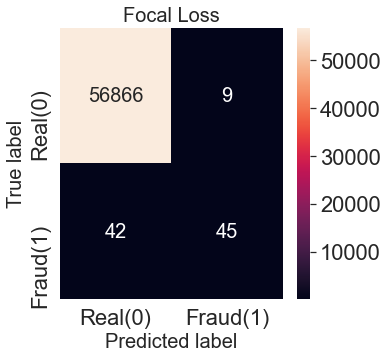

total monetary loss: 8481.850000000002



In [57]:
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
predictions = mod_focal.predict(X_test, batch_size=1000)

LABELS = ['Real(0)','Fraud(1)'] 

max_test = np.argmax(y_test, axis=1) # 0 for real, 1 for fraud
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Focal Loss", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()
#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))
print()

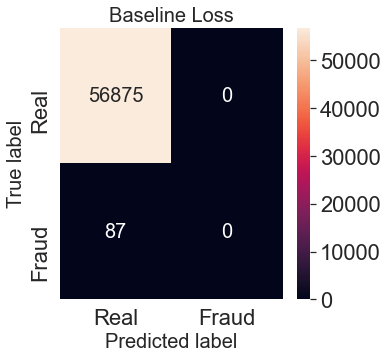

total monetary loss: 13725.740000000005


In [58]:
predictions = mod_ce_acc.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Baseline Loss", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))


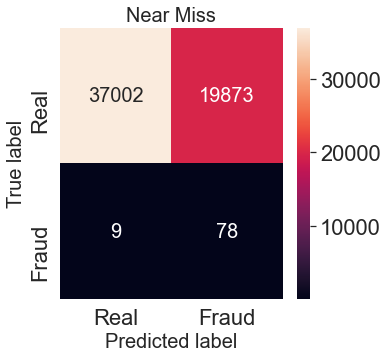

total monetary loss: 1757.8400000000001


In [59]:
predictions = mod_nearmiss.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Near Miss", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

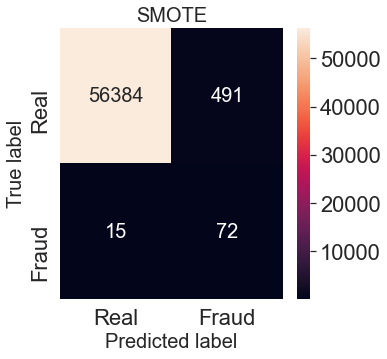

total monetary loss: 5136.16


In [60]:
predictions = mod_SMOTE.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("SMOTE", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

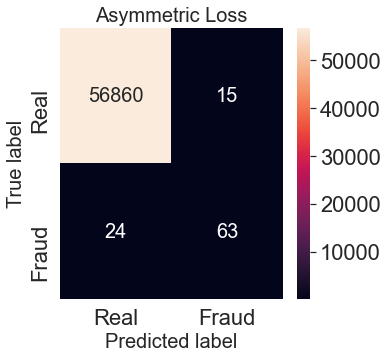

total monetary loss: 5148.31


In [61]:
predictions = mod_ce_bal.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Asymmetric Loss", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

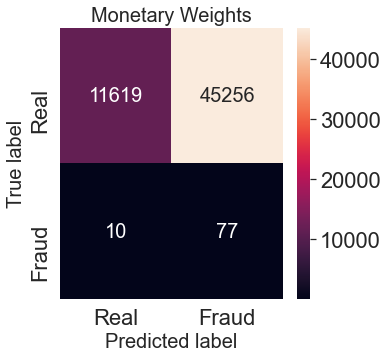

total monetary loss: 7634.910000000001


In [62]:
predictions = mod_ce_weight.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Monetary Weights", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

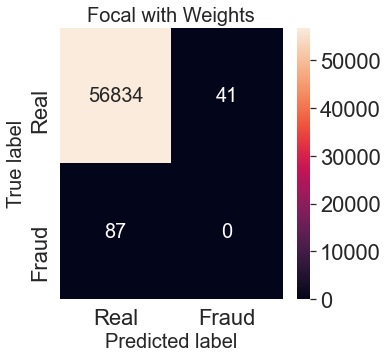

total monetary loss: 13725.740000000005


In [63]:

predictions = mod_foc_weight.predict(X_test, batch_size=1000)

LABELS = ['Real','Fraud'] 

max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Focal with Weights", fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

#number of fraud cases categorizes as real -> get the amount of money
X_temp = X_orig.iloc[X_test.index]['Amount']
total_monetary_loss = sum(X_temp[(max_test != max_predictions) & (max_test == 1)])
print("total monetary loss: " + str(total_monetary_loss))

### Epoch plots

In [67]:
hist_ce.history

{'loss': [0.00995800644159317,
  0.00990098062902689,
  0.009844868443906307,
  0.009789818897843361,
  0.009735899977385998,
  0.009682481177151203,
  0.009631002321839333,
  0.00958065502345562,
  0.009531106799840927,
  0.009483017027378082,
  0.009435875341296196,
  0.00939030572772026,
  0.009346257895231247,
  0.009302977472543716,
  0.009260059334337711,
  0.009217397309839725,
  0.009175218641757965,
  0.009133730083703995,
  0.009092760272324085,
  0.009051939472556114,
  0.009011609479784966,
  0.008971625939011574,
  0.008931932039558887,
  0.008892649784684181,
  0.008853424340486526,
  0.008814726956188679,
  0.008776470087468624,
  0.008738407865166664,
  0.00870044156908989,
  0.00866280123591423,
  0.00862522516399622,
  0.008587758988142014,
  0.008550523780286312,
  0.008514280430972576,
  0.008478089235723019,
  0.008442042395472527,
  0.008406121283769608,
  0.008370333351194859,
  0.008334849961102009,
  0.008299154229462147],
 'categorical_crossentropy': [0.032337

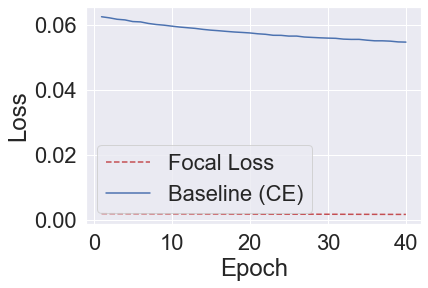

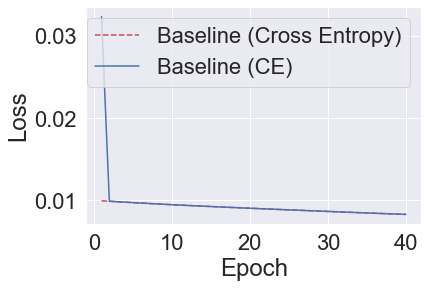

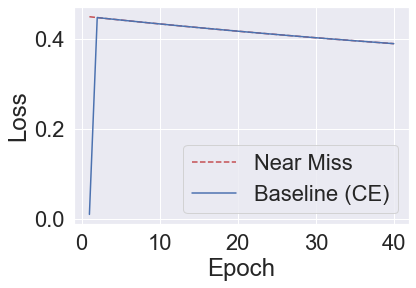

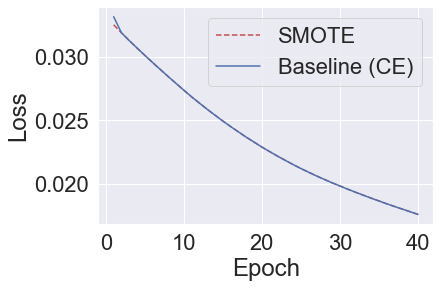

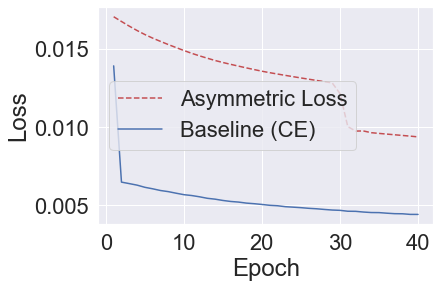

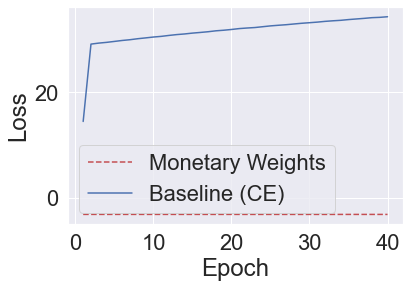

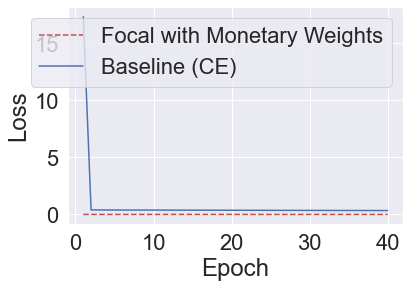

In [117]:
#Comparison against Basline: Cat Cross Entropy
# Get training and test loss histories
tr_loss=np.empty(7,dtype=object)
tr_loss[0] = hist_focal.history['loss']
tr_loss[1] = hist_ce.history['loss']
tr_loss[2] = hist_nemi.history['loss']
tr_loss[3] = hist_smote.history['loss']
tr_loss[4] = hist_bal.history['loss']
tr_loss[5] = hist_weight.history['loss']
tr_loss[6] = hist_focweight.history['loss']

test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['categorical_crossentropy']
test_loss[1] = hist_ce.history['categorical_crossentropy']
test_loss[2] = hist_nemi.history['categorical_crossentropy']
test_loss[3] = hist_smote.history['categorical_crossentropy']
test_loss[4] = hist_bal.history['categorical_crossentropy'] #asymmetric loss
test_loss[5] = hist_weight.history['categorical_crossentropy'] #monetary weights
test_loss[6] = hist_focweight.history['categorical_crossentropy']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
for i in range(0,len(tr_loss)):
    plt.plot(epoch_count, tr_loss[i], 'r--')
    plt.plot(epoch_count, test_loss[i], 'b-')    
    plt.legend([titles[i], 'Baseline (CE)'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();


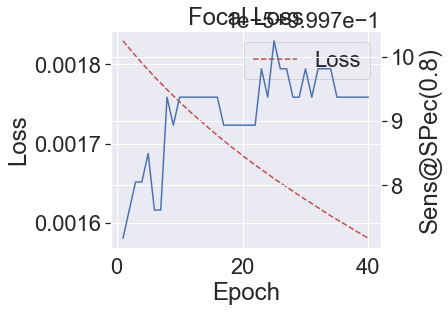

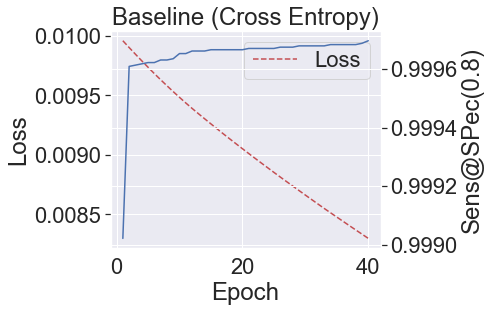

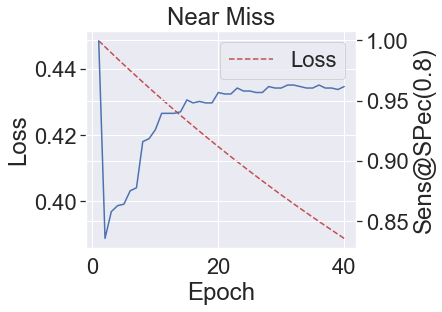

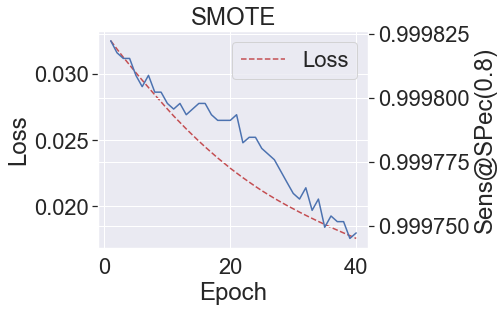

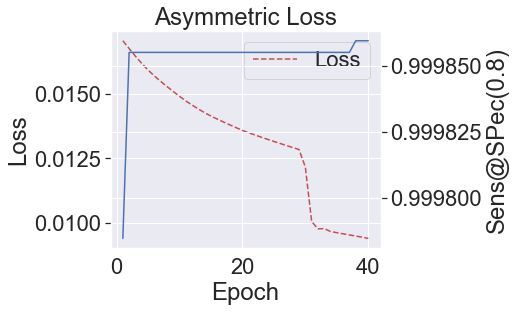

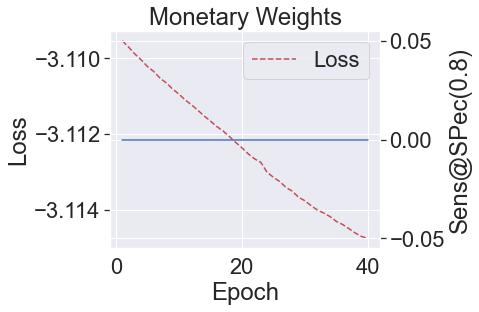

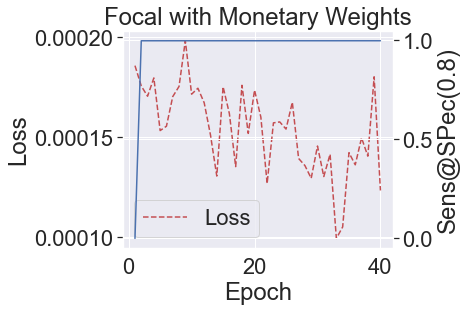

In [152]:
#SENSITIVITY AT SPECIFICITY

# Get training and test loss histories
tr_loss=np.empty(7,dtype=object)
tr_loss[0] = hist_focal.history['loss']
tr_loss[1] = hist_ce.history['loss']
tr_loss[2] = hist_nemi.history['loss']
tr_loss[3] = hist_smote.history['loss']
tr_loss[4] = hist_bal.history['loss']
tr_loss[5] = hist_weight.history['loss']
tr_loss[6] = hist_focweight.history['loss']

test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['sensitivity_at_specificity_3']
test_loss[1] = hist_ce.history['sensitivity_at_specificity_3']
test_loss[2] = hist_nemi.history['sensitivity_at_specificity_3']
test_loss[3] = hist_smote.history['sensitivity_at_specificity_3']
test_loss[4] = hist_bal.history['sensitivity_at_specificity_3']
test_loss[5] = hist_weight.history['sensitivity_at_specificity_3']
test_loss[6] = hist_focweight.history['sensitivity_at_specificity_3']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
# Visualize loss history
for i in range(0,len(tr_loss)):
    fig, ax = plt.subplots()
    axes = [ax, ax.twinx()]
    fig.subplots_adjust(right=0.75)
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)
    
    axes[0].plot(epoch_count, tr_loss[i], 'r--')  
    axes[0].legend(['Loss'])
    axes[0].set_ylabel('Loss')
    axes[1].plot(epoch_count, test_loss[i], 'b-')  
    axes[1].set_ylabel('Sens@Spec(0.8)')
    
    axes[0].set_xlabel('Epoch')
    plt.title(titles[i])
    plt.show()



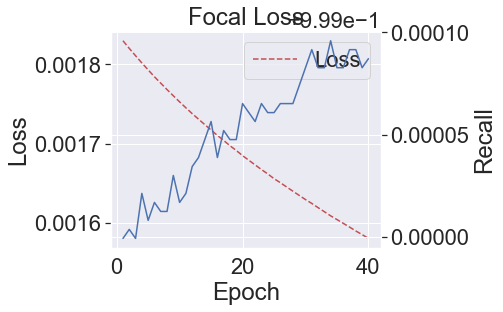

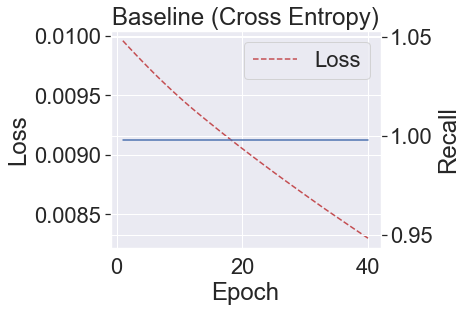

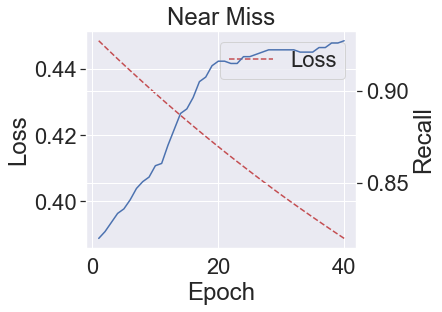

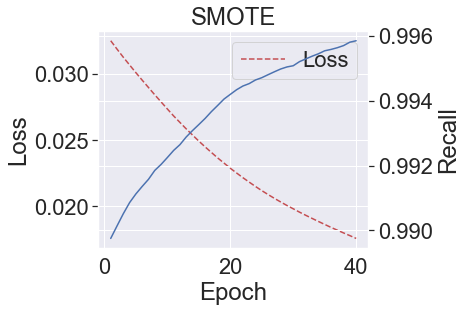

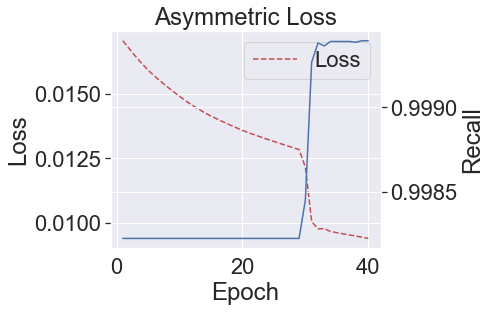

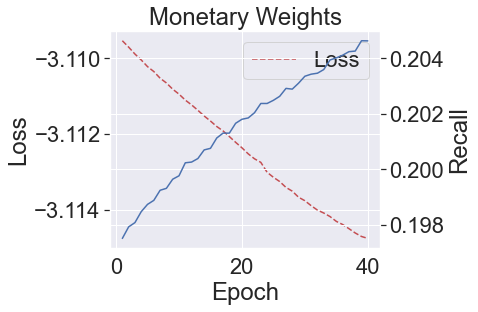

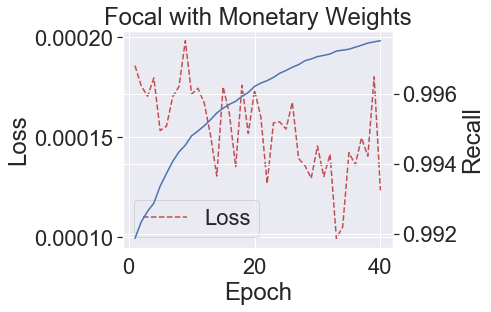

In [150]:
#RECALL

# Get training and test loss histories
tr_loss=np.empty(7,dtype=object)
tr_loss[0] = hist_focal.history['loss']
tr_loss[1] = hist_ce.history['loss']
tr_loss[2] = hist_nemi.history['loss']
tr_loss[3] = hist_smote.history['loss']
tr_loss[4] = hist_bal.history['loss']
tr_loss[5] = hist_weight.history['loss']
tr_loss[6] = hist_focweight.history['loss']

test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['recall']
test_loss[1] = hist_ce.history['recall']
test_loss[2] = hist_nemi.history['recall']
test_loss[3] = hist_smote.history['recall']
test_loss[4] = hist_bal.history['recall']
test_loss[5] = hist_weight.history['recall']
test_loss[6] = hist_focweight.history['recall']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
for i in range(0,len(tr_loss)):
    fig, ax = plt.subplots()
    axes = [ax, ax.twinx()]
    fig.subplots_adjust(right=0.75)
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)
    
    axes[0].plot(epoch_count, tr_loss[i], 'r--')  
    axes[0].legend(['Loss'])
    axes[0].set_ylabel('Loss')
    axes[1].plot(epoch_count, test_loss[i], 'b-')  
    axes[1].set_ylabel('Recall')
    
    axes[0].set_xlabel('Epoch')
    plt.title(titles[i])
    plt.show()


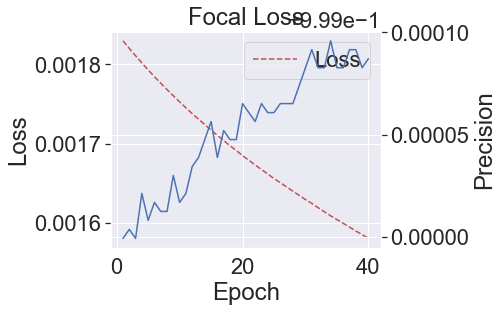

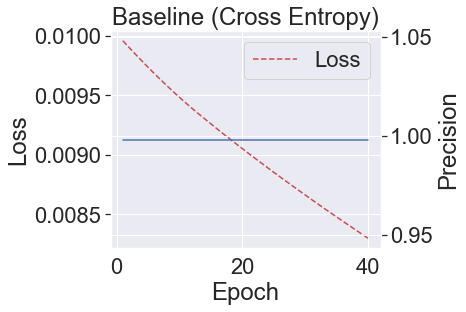

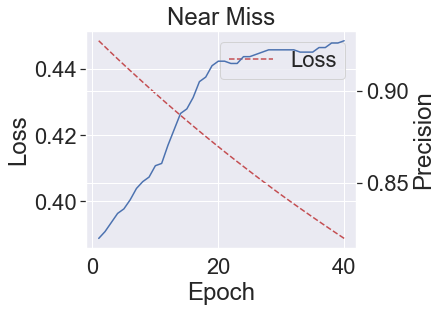

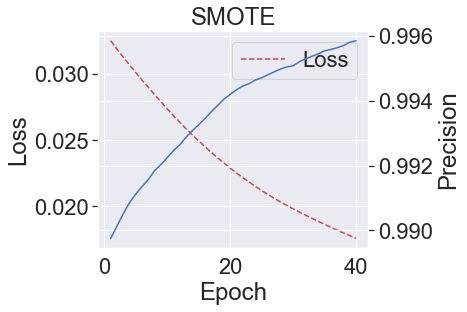

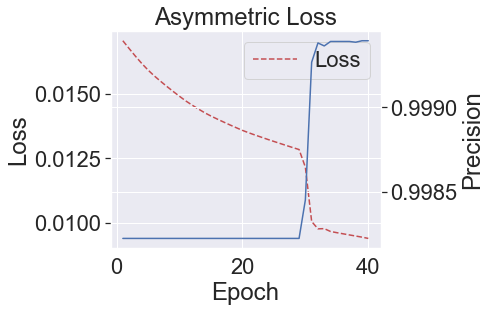

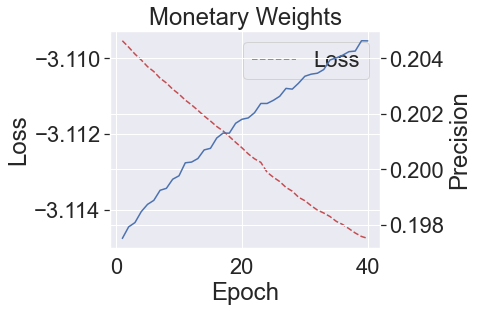

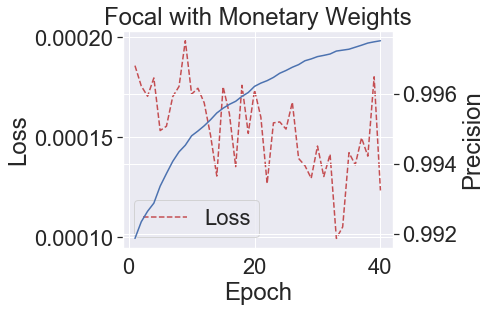

In [154]:
#RECALL

# Get training and test loss histories
tr_loss=np.empty(7,dtype=object)
tr_loss[0] = hist_focal.history['loss']
tr_loss[1] = hist_ce.history['loss']
tr_loss[2] = hist_nemi.history['loss']
tr_loss[3] = hist_smote.history['loss']
tr_loss[4] = hist_bal.history['loss']
tr_loss[5] = hist_weight.history['loss']
tr_loss[6] = hist_focweight.history['loss']

test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['precision']
test_loss[1] = hist_ce.history['precision']
test_loss[2] = hist_nemi.history['precision']
test_loss[3] = hist_smote.history['precision']
test_loss[4] = hist_bal.history['precision']
test_loss[5] = hist_weight.history['precision']
test_loss[6] = hist_focweight.history['precision']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
for i in range(0,len(tr_loss)):
    fig, ax = plt.subplots()
    axes = [ax, ax.twinx()]
    fig.subplots_adjust(right=0.75)
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)
    
    axes[0].plot(epoch_count, tr_loss[i], 'r--')  
    axes[0].legend(['Loss'])
    axes[0].set_ylabel('Loss')
    axes[1].plot(epoch_count, test_loss[i], 'b-')  
    axes[1].set_ylabel('Precision')
    
    axes[0].set_xlabel('Epoch')
    plt.title(titles[i])
    plt.show()


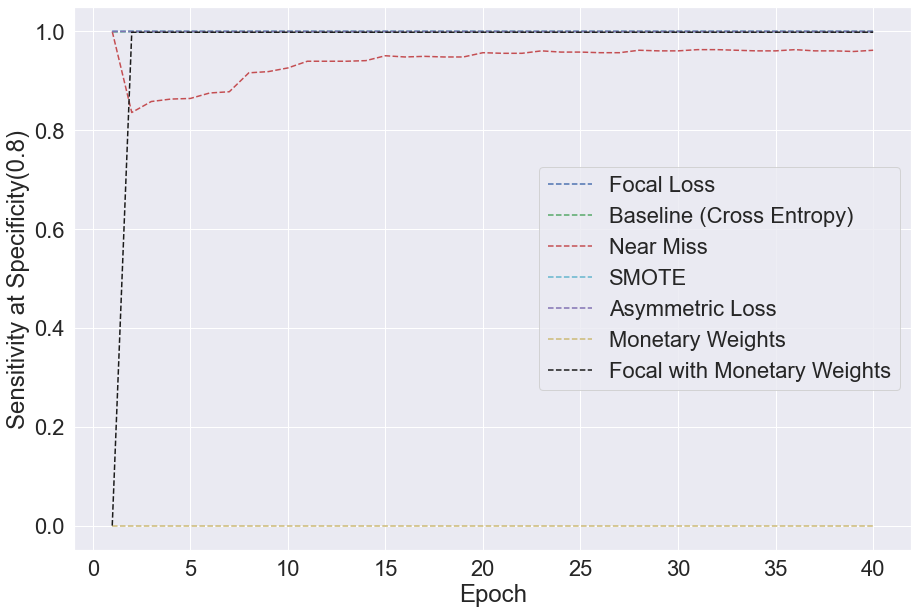

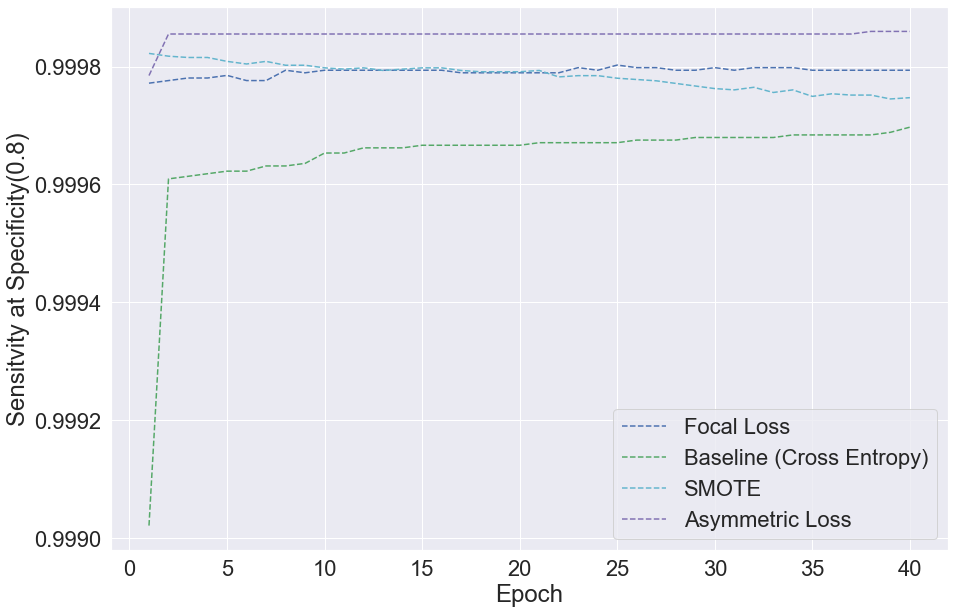

In [114]:
#SENS AT SPEC
test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['sensitivity_at_specificity_3']
test_loss[1] = hist_ce.history['sensitivity_at_specificity_3']
test_loss[2] = hist_nemi.history['sensitivity_at_specificity_3']
test_loss[3] = hist_smote.history['sensitivity_at_specificity_3']
test_loss[4] = hist_bal.history['sensitivity_at_specificity_3']
test_loss[5] = hist_weight.history['sensitivity_at_specificity_3']
test_loss[6] = hist_focweight.history['sensitivity_at_specificity_3']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]
legcolors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--']

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
plt.figure(figsize=(15,10))
for i in range(0,len(tr_loss)):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles)
plt.xlabel('Epoch')
plt.ylabel('Sensitivity at Specificity(0.8)')
plt.show();

plt.figure(figsize=(15,10))
for i in [0,1,3,4]:
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(['Focal Loss', 'Baseline (Cross Entropy)','SMOTE','Asymmetric Loss'])
plt.xlabel('Epoch')
plt.ylabel('Sensitvity at Specificity(0.8)')
plt.show();

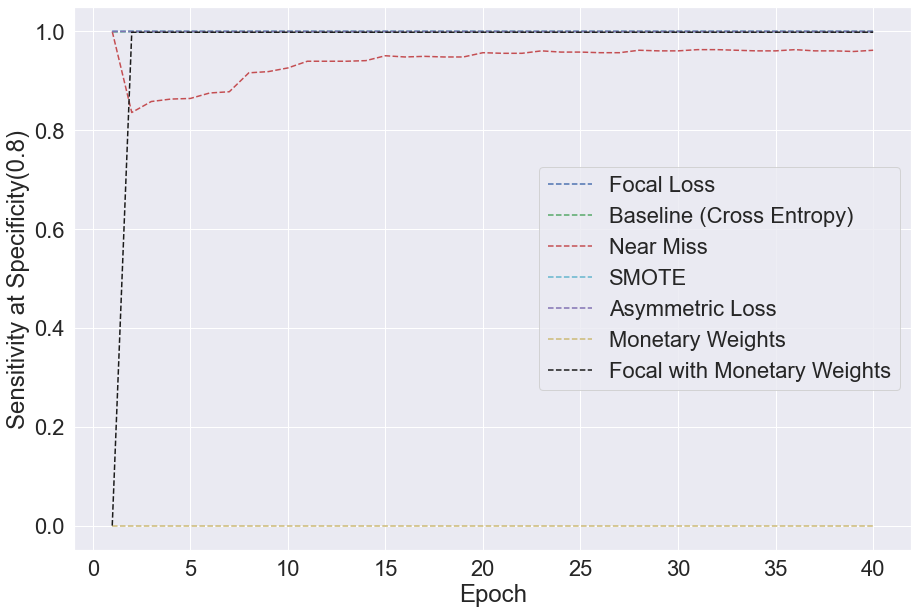

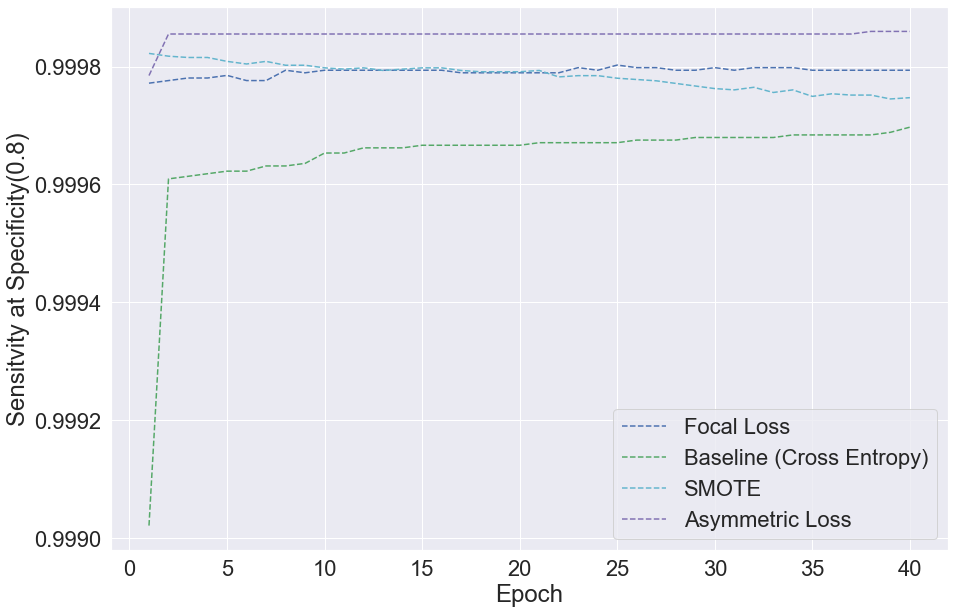

In [115]:
#SPEC AT SENS
test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['sensitivity_at_specificity_3']
test_loss[1] = hist_ce.history['sensitivity_at_specificity_3']
test_loss[2] = hist_nemi.history['sensitivity_at_specificity_3']
test_loss[3] = hist_smote.history['sensitivity_at_specificity_3']
test_loss[4] = hist_bal.history['sensitivity_at_specificity_3']
test_loss[5] = hist_weight.history['sensitivity_at_specificity_3']
test_loss[6] = hist_focweight.history['sensitivity_at_specificity_3']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]
legcolors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--']

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
plt.figure(figsize=(15,10))
for i in range(0,len(tr_loss)):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles)
plt.xlabel('Epoch')
plt.ylabel('Sensitivity at Specificity(0.8)')
plt.show();

plt.figure(figsize=(15,10))
for i in [0,1,3,4]:
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(['Focal Loss', 'Baseline (Cross Entropy)','SMOTE','Asymmetric Loss'])
plt.xlabel('Epoch')
plt.ylabel('Sensitvity at Specificity(0.8)')
plt.show();

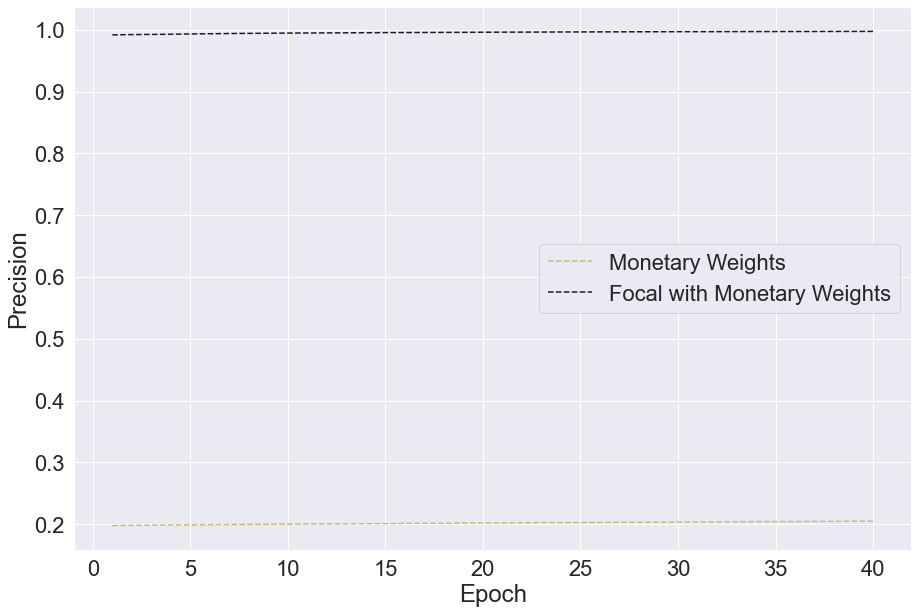

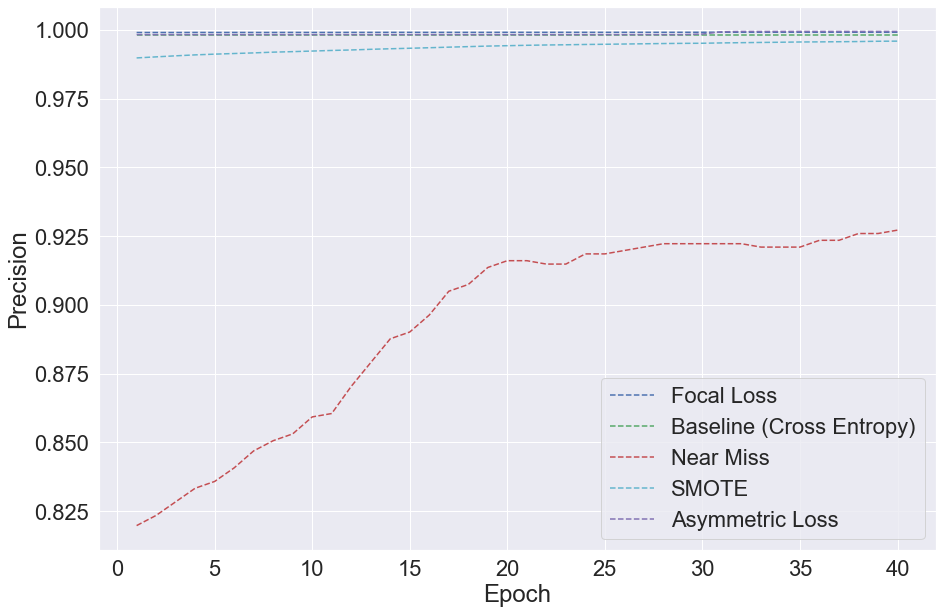

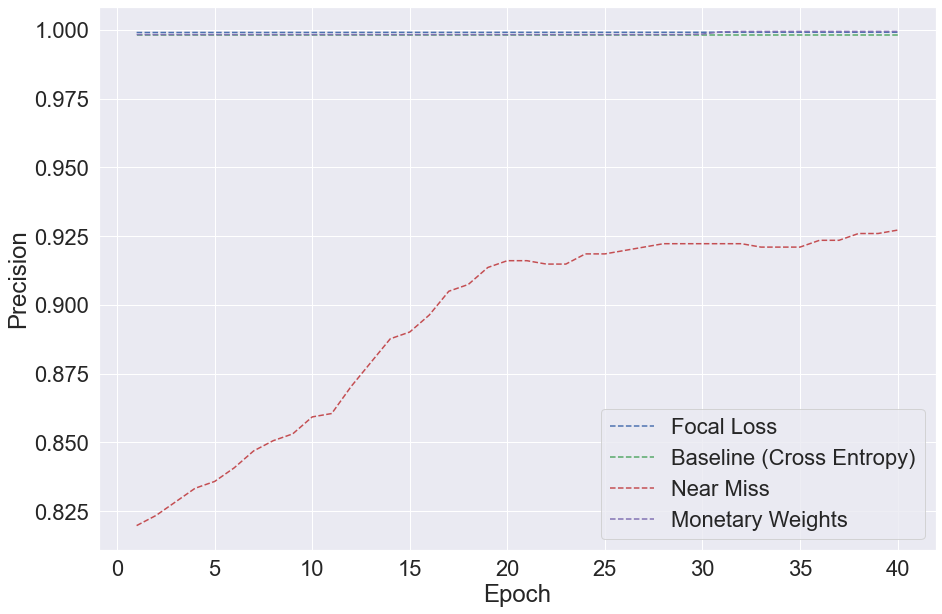

In [155]:
test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['precision']
test_loss[1] = hist_ce.history['precision']
test_loss[2] = hist_nemi.history['precision']
test_loss[3] = hist_smote.history['precision']
test_loss[4] = hist_bal.history['precision']
test_loss[5] = hist_weight.history['precision']
test_loss[6] = hist_focweight.history['precision']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]
legcolors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--']

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
plt.figure(figsize=(15,10))
for i in range(5,len(tr_loss)):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles[5:])
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show();

plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show();

plt.figure(figsize=(15,10))
for i in [0,1,2,4]:
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(['Focal Loss', 'Baseline (Cross Entropy)', 'Near Miss', 'Monetary Weights'])
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show();

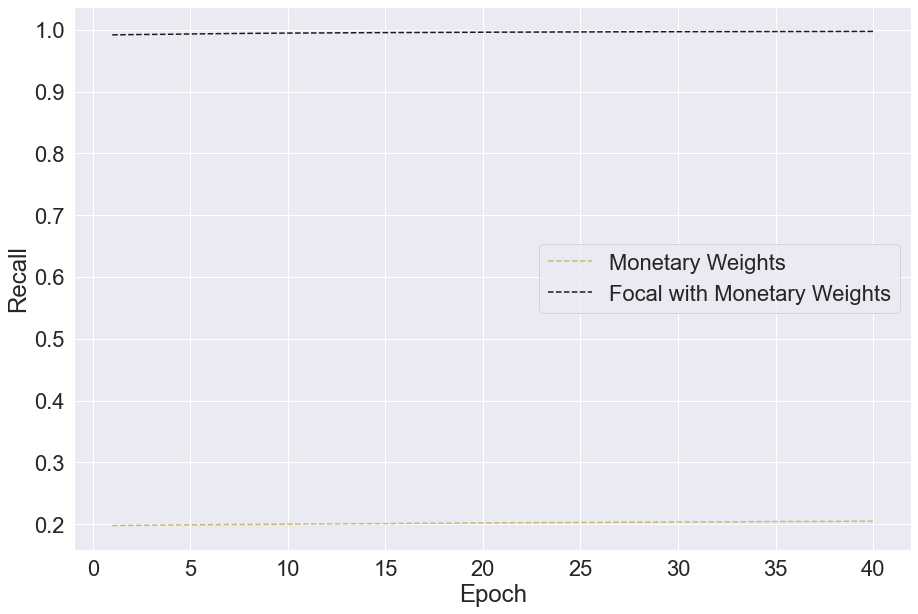

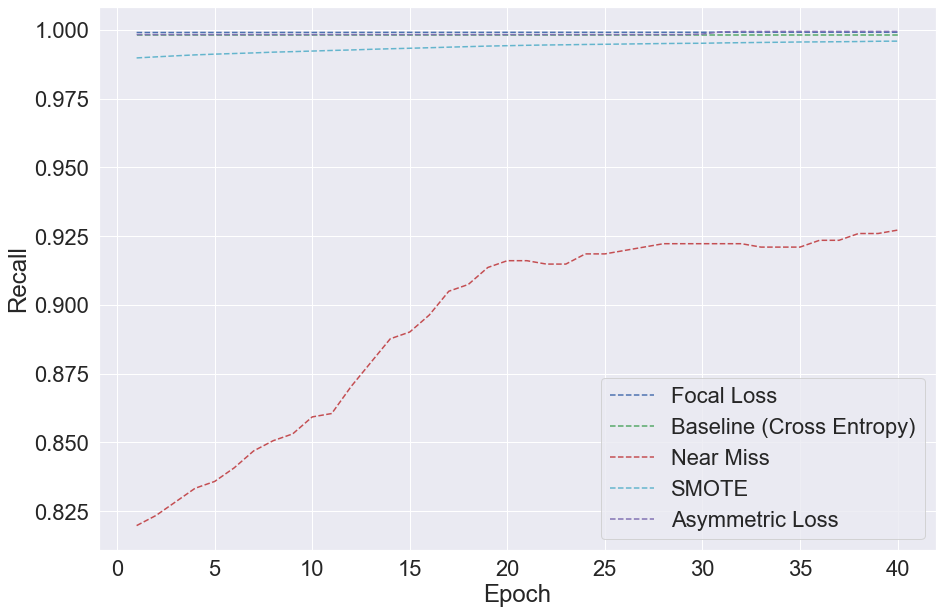

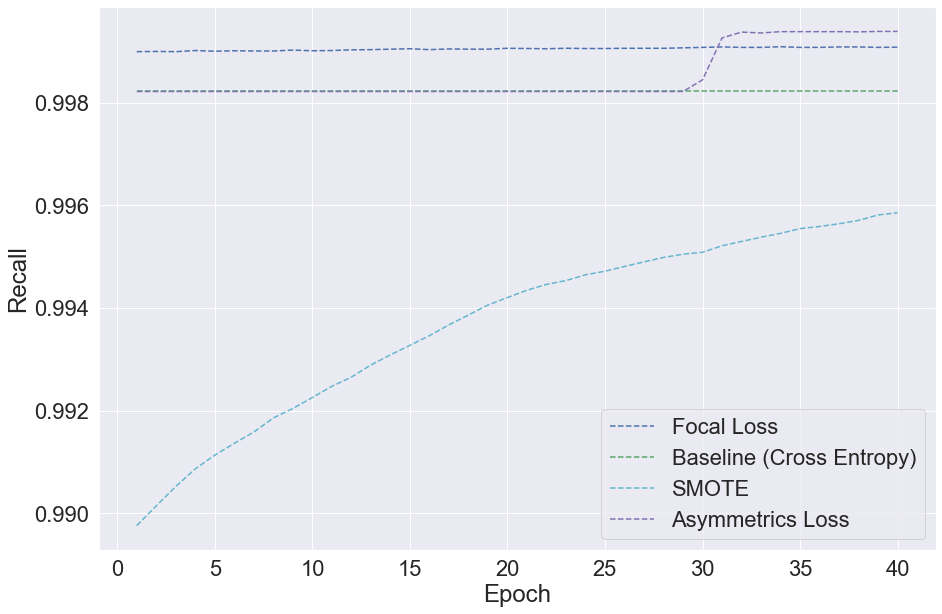

In [157]:
##RECALL
test_loss=np.empty(7,dtype=object)
test_loss[0] = hist_focal.history['recall']
test_loss[1] = hist_ce.history['recall']
test_loss[2] = hist_nemi.history['recall']
test_loss[3] = hist_smote.history['recall']
test_loss[4] = hist_bal.history['recall']
test_loss[5] = hist_weight.history['recall']
test_loss[6] = hist_focweight.history['recall']

titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]
legcolors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--']

# Create count of the number of epochs
epoch_count = range(1, len(tr_loss[1]) + 1)

# Visualize loss history
plt.figure(figsize=(15,10))
for i in range(5,len(tr_loss)):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles[5:])
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.show();

plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(titles)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.show();

plt.figure(figsize=(15,10))
for i in [0,1,3,4]:
    plt.plot(epoch_count, test_loss[i], legcolors[i])
    plt.legend(['Focal Loss', 'Baseline (Cross Entropy)', 'SMOTE', 'Asymmetrics Loss'])
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.show();

In [82]:
##AUC setup
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, color): 
    y_pred_keras = model.predict(X_test)
    y_pred_keras = y_pred_keras[:,1] #convert categorical to binary. the second column is the proba of being fraud = P(isFraud==1)
    fpr, tpr, thresholds_keras = roc_curve(y_num_test, y_pred_keras)
    roc_auc = roc_auc_score(y_num_test, y_pred_keras)
    plt.plot(fpr,tpr,label='AUC = %0.3f'% roc_auc) 
    plt.axis([0,1,0,1]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    print(roc_auc)


0.9027227485158519
0.8925670834912214
0.9560992295061261
0.5278074017936087
0.13339416445623342
0.9382737905772388
0.8977279272451686


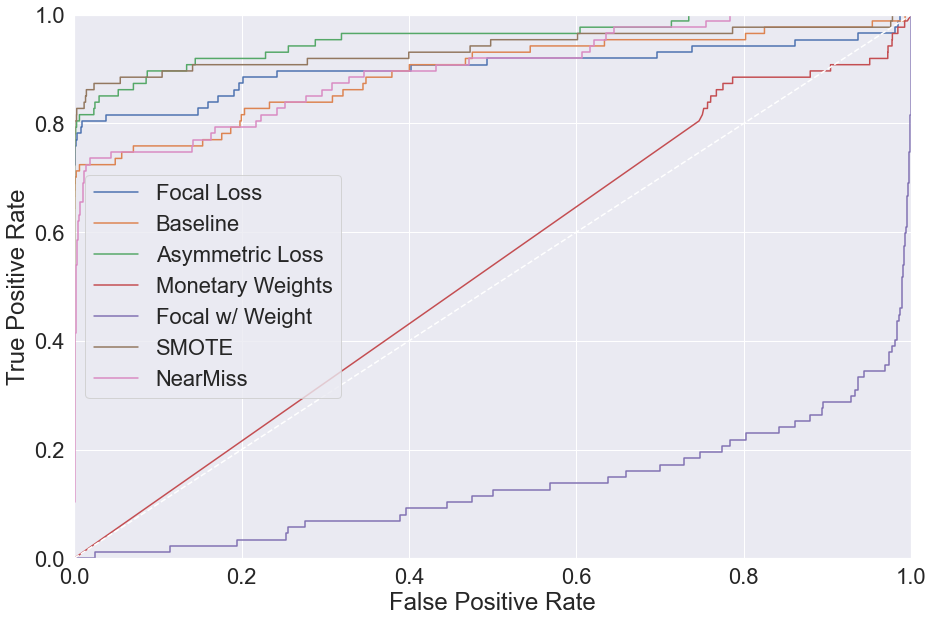

In [119]:
#note: false positive is case where true state is real, but cateforized as fraud.
plt.figure(figsize=(15,10))
plot_roc_curve(mod_focal, 'c--')
plot_roc_curve(mod_ce_acc, 'b--')
plot_roc_curve(mod_ce_bal, 'y--')
plot_roc_curve(mod_ce_weight , 'g--')
plot_roc_curve(mod_foc_weight, 'w--')
plot_roc_curve(mod_SMOTE, 'm--')
plot_roc_curve(mod_nearmiss, 'k--')


plt.legend(['Focal Loss', 'Baseline', 'Asymmetric Loss', 'Monetary Weights', 'Focal w/ Weight', 'SMOTE', 'NearMiss'])
plt.plot([0,1],[0,1],'w--')
plt.show()

In [84]:
#precision recall curve
from sklearn.metrics import precision_recall_curve
def plot_pr_curve(model, color): 
    y_pred_keras = model.predict(X_test)
    y_pred_keras = y_pred_keras[:,1] #convert categorical to binary. the second column is the proba of being fraud = P(isFraud==1)
    precision, recall, thresholds_keras = precision_recall_curve(y_num_test, y_pred_keras)
    plt.plot(recall,precision) #x,y
    plt.axis([0,1,0,1]) 
    plt.xlabel('Recall') 
    plt.ylabel('Precision') 

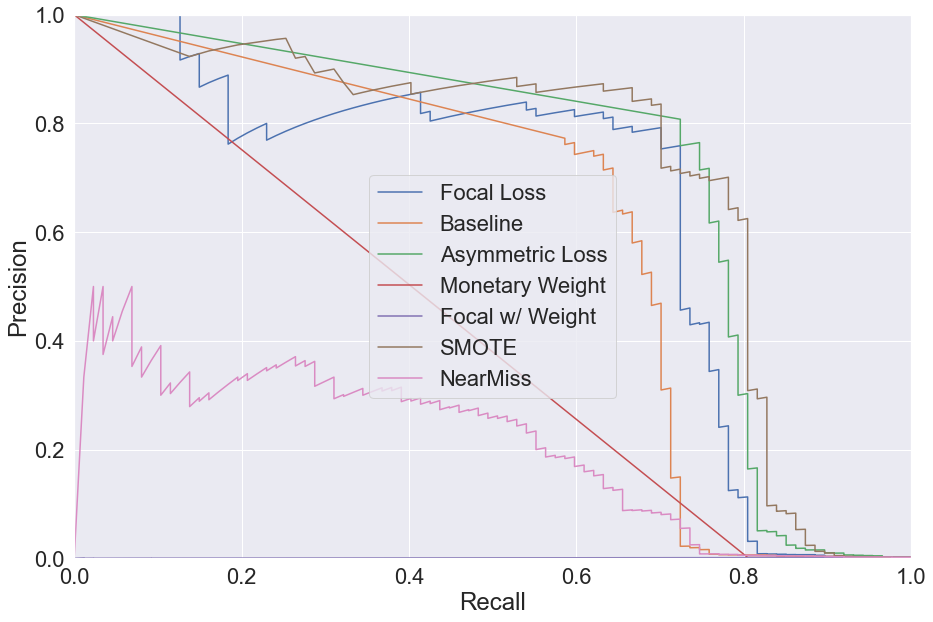

In [110]:
#note: false positive is case where true state is real, but cateforized as fraud.
plt.figure(figsize=(15,10))
plot_pr_curve(mod_focal, 'c--')
plot_pr_curve(mod_ce_acc, 'b--')
plot_pr_curve(mod_ce_bal, 'y--')
plot_pr_curve(mod_ce_weight , 'g--')
plot_pr_curve(mod_foc_weight, 'w--')
plot_pr_curve(mod_SMOTE, 'm--')
plot_pr_curve(mod_nearmiss, 'k--')


plt.legend(['Focal Loss', 'Baseline', 'Asymmetric Loss','Monetary Weight', 'Focal w/ Weight', 'SMOTE', 'NearMiss'])
plt.show()

In [ ]:
## Time

Focal Loss:81.70484280586243
Cross Entropy (Baseline):78.24843716621399
Near Miss:2.662081003189087
SMOTE:162.06690430641174
Asymmetric Loss:82.728346824646
Monetary Weights:81.7463116645813
Focal w/ Weights:85.28272914886475


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

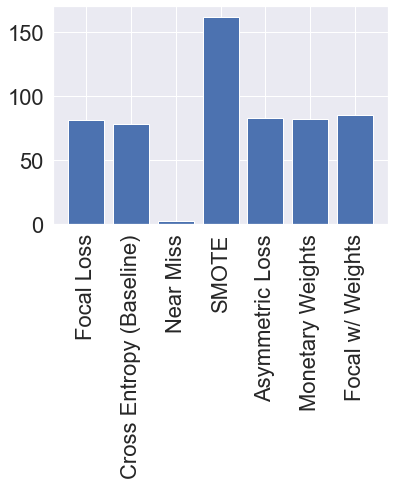

In [109]:
#totals
print("Focal Loss:"+str(np.sum(time_focal.times))+"\n"
"Cross Entropy (Baseline):"+str(np.sum(time_ce.times))+"\n"
"Near Miss:"+str(np.sum(time_nemi.times))+"\n"
"SMOTE:"+str(np.sum(time_smote.times))+"\n"
"Asymmetric Loss:"+str(np.sum(time_bal.times))+"\n"
"Monetary Weights:"+str(np.sum(time_weight.times))+"\n"
"Focal w/ Weights:"+str(np.sum(time_focweight.times)))


bars = [np.sum(time_focal.times),
np.sum(time_ce.times),
np.sum(time_nemi.times),
np.sum(time_smote.times),
np.sum(time_bal.times),
np.sum(time_weight.times),
np.sum(time_focweight.times)]

plt.bar(["Focal Loss","Cross Entropy (Baseline)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal w/ Weights"],bars)
plt.xticks(rotation=90)

In [101]:
bars

[81.70484280586243,
 78.24843716621399,
 2.662081003189087,
 162.06690430641174,
 82.728346824646,
 81.7463116645813,
 85.28272914886475]

[81.70484280586243,
 78.24843716621399,
 2.662081003189087,
 162.06690430641174,
 82.728346824646,
 81.7463116645813,
 85.28272914886475]

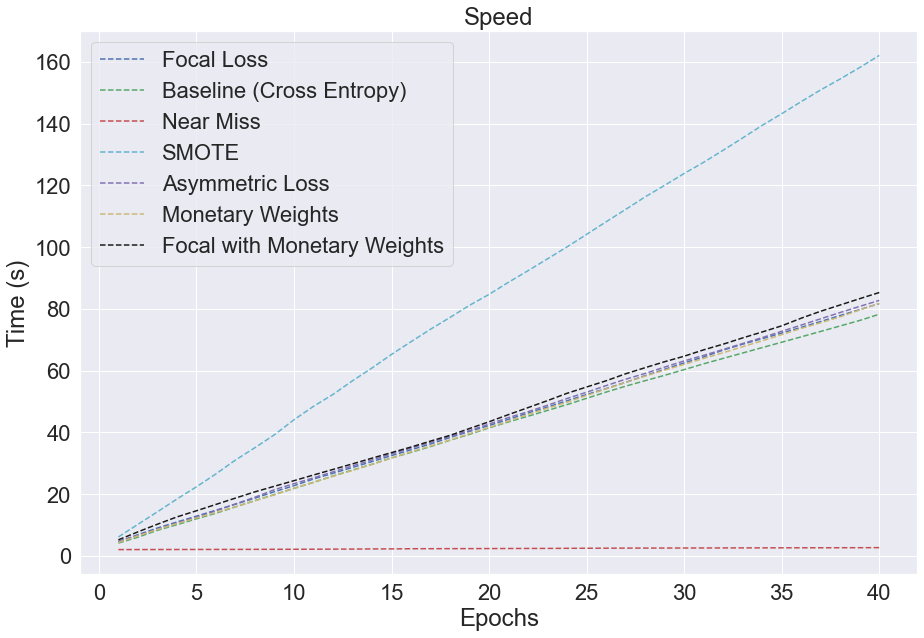

In [121]:
temp=np.empty(7,dtype=object)
temp[0] = np.cumsum(time_focal.times)
temp[1] = np.cumsum(time_ce.times)
temp[2] = np.cumsum(time_nemi.times)
temp[3] = np.cumsum(time_smote.times)
temp[4] = np.cumsum(time_bal.times)
temp[5] = np.cumsum(time_weight.times)
temp[6] = np.cumsum(time_focweight.times)


titles = ["Focal Loss","Baseline (Cross Entropy)","Near Miss","SMOTE","Asymmetric Loss","Monetary Weights","Focal with Monetary Weights"]
legcolors = ['b--', 'g--', 'r--', 'c--', 'm--', 'y--', 'k--', 'w--']

plt.figure(figsize=(15,10))

for i in range(0,len(temp)):
    plt.plot(epoch_count,temp[i], legcolors[i])
    plt.legend(titles)

plt.xlabel('Epochs') 
plt.ylabel('Time (s)')
plt.title('Speed')
    
[np.sum(time_focal.times),
np.sum(time_ce.times),
np.sum(time_nemi.times),
np.sum(time_smote.times),
np.sum(time_bal.times),
np.sum(time_weight.times),
np.sum(time_focweight.times)]